In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import multiprocessing as mp
import pandas as pd
import scipy.io as sio


In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.

# Load Training Data
print('Loading and Visualizing Data ...\n')
mat_contents = sio.loadmat('ex3data1.mat')
#print(mat_contents)
X = mat_contents['X']
y = mat_contents['y']
m = len(y);
print(m)

# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
print(rand_indices)
rand_indices = rand_indices.reshape(-1, 1)
sel = X[rand_indices[0:100, :]]
print(sel)


Loading and Visualizing Data ...

5000
[3694 1918 3882 ... 4352 4096 3716]
[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]


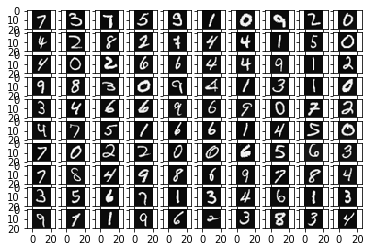

In [3]:
# def displayData(X, example_width = None):
# #     if ~exist('example_width', 'var') || isempty(example_width) 
# #         example_width = round(sqrt(size(X, 2)));
# #     end
#     if (example_width == None):
#         example_width = round(np.sqrt((X.shape[1])))
#         print(example_width)
#     plt.colormaps()
    
# #     from colormap import Colormap
# #     c = Colormap()
# #     mycmap = c.cmap_linear('red', 'white', 'green(w3c)')
# #     c.test_colormap(mycmap)
#     # Compute rows, cols
#     m, n = X.shape;
#     example_height = (n / example_width);
    
    
#     display_rows = np.floor(np.sqrt(m));
#     display_cols = np.ceil(m / display_rows);

#     # Between images padding
#     pad = 1;

#     # Setup blank display
#     #print (pad + (np.dot(display_cols , (example_width + pad))))
#     display_array = - np.ones(pad + np.dot(display_rows, (example_height + pad)), pad + np.dot(display_cols , (example_width + pad)))
#     print(display_array)
    
    
    
def displayData(X):
    fig, ax = plt.subplots(10,10,sharex=True,sharey=True)
    img_num = 0
    for i in range(10):
        for j in range(10):
            # Convert column vector into 20x20 pixel matrix
            # You have to transpose to display correctly
            img = X[img_num,:].reshape(20,20).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1

    return (fig, ax)
    
displayData(sel);
  
    
        
    



In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z));

In [5]:
print('\nTesting lrCostFunction() with regularization')
theta_t = np.array([[-2], [-1], [1], [2]])
X_t = np.c_[np.ones(5).reshape(-1, 1), np.arange(1, 16).reshape(3,5).T/10]
y_t = (np.array([[1], [0], [1], [0], [1]]) >= 0.5) * 1
lambda_t = 3

def lrCostFunction(theta, X, y, lambda_t):   
    m = len(y)
    h = sigmoid(X.dot(theta)).reshape(-1, 1)
    a = np.c_[np.array([0])]
    
    theta = theta.reshape(-1, 1)
    theta1 = np.concatenate((a, theta[1:theta.size, :]))
    theta1 = theta1.reshape(-1, 1)
   
    p = (lambda_t * (theta1.T.dot(theta1))) / (2*m)
    J = np.sum(((-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))/m) + p)
    return J

def gradient(theta, X, y, lambda_t):
    m = len(y)
    h = sigmoid(X.dot(theta)).reshape(-1, 1)
    a = np.c_[np.array([0])]
    theta = theta.reshape(-1, 1)
    theta1 = np.concatenate((a, theta[1:theta.size, :]))
    theta1 = theta1.reshape(-1, 1)
    grad = (X.T.dot(h - y) + (lambda_t * theta1)) / m
    return grad.flatten() 

    

J = lrCostFunction(theta_t, X_t, y_t, lambda_t)
grad = gradient(theta_t, X_t, y_t, lambda_t)
print('\nCost: \n', J);
print('Expected cost: 2.534819\n');
print('Gradients:\n');
print('\n', grad);
print('Expected gradients:\n');
print('0.146561\n -0.548558\n 0.724722\n 1.398003\n');



Testing lrCostFunction() with regularization

Cost: 
 2.5348193961097443
Expected cost: 2.534819

Gradients:


 [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:

0.146561
 -0.548558
 0.724722
 1.398003



In [6]:
# def lrCostFunction(theta,X,y,reg_param):
#     m = len(y) 
#     J =((np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-
#        (1-y)*(np.log(1-sigmoid(np.dot(X,theta))))))/m +
#        (reg_param/m)*np.sum(theta**2))   
#     # Gradient
#     # Non-regularized 
#     grad_0 = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m)
#     # Regularized
#     grad_reg = grad_0 + (reg_param/m)*theta
#     grad_reg[0] = grad_0[0] 
#     return (J,grad_reg)

# def oneVsAll(X, y, num_labels, reg_param):
#     #Calculates parameters 
#     n = np.size(X,1)
#     theta = np.zeros((n,num_labels))
#     # Function to find parameters for single logit
# #     def findOptParam(p_num):
# #         outcome = np.array(y == p_num).astype(int)
# #         initial_theta = theta[:,p_num]
# #         results = opt.minimize(lrCostFunction,initial_theta,method='Newton-CG',args=(X,outcome,reg_param),jac=True, tol=1e-6, options={'maxiter':400,'disp':True})
# #         theta[:,p_num] = results.x
    
    
# #     for digit in range(10):
# #         findOptParam(digit)
    
#     return theta

In [7]:
def oneVsAll(X, y, num_labels, lambda1):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.c_[np.ones(m), X]
    initial_theta = np.zeros((n + 1, 1))
    
#     for c in range(1, num_labels):
#         res = opt.minimize(lrCostFunction, initial_theta, args=(X, (y == c), lambda1), method=None, jac=gradient, options={'maxiter':500})
#         print(res.nit, res.message)
    for c in range(num_labels):
        res = opt.minimize(lrCostFunction, initial_theta, args=(X, ((y == (c + 1)) * 1), lambda1), jac=gradient, method=None, options={'maxiter':500})
        all_theta[c, :] = res.x
        print(res.message)
    
    return all_theta


# def oneVsAll(X, y, num_labels, lamb):
#     m = X.shape[0]
#     n = X.shape[1]
# #   all_theta = np.array(1)
#     all_theta = np.zeros((num_labels, n + 1))

#     X = np.c_[np.ones(m),X]
#     initial_theta = np.zeros(n+1);
#     for c in  range(1,num_labels+1):
#         res = opt.minimize(lrCostFunction,initial_theta, args=(X,(y==c),lamb), jac=gradient, options={'maxiter':50,'disp':True})
# #       print(all_theta.shape)
# #       print(res.x.reshape(1,-1).shape)
#         all_theta = np.vstack((all_theta,res.x.reshape(1,-1)))
#     all_theta = all_theta[10:]
# #     print(all_theta.shape)
#     return all_theta

#all_theta = oneVsAll(X, y, num_labels, lamb)


lambda1 = 0.1

all_theta = oneVsAll(X, y, num_labels, lambda1)


Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.
Optimization terminated successfully.


In [8]:
def predictOneVsAll(all_theta_, X):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]
    ps = sigmoid(X.dot(all_theta_.T))
    p = ps.argmax(axis=1).reshape(-1, 1)
    return p
    
pred = predictOneVsAll(all_theta, X)
print('\nTraining Set Accuracy: \n',  np.mean((pred + 1) == y) * 100)


# def predictOneVsAll(all_theta, X):
#     m =X.shape[0] # size(X, 1);
#     X = np.c_[np.ones((m, 1)) ,X];
#     h = sigmoid(X.dot(all_theta.T));
#     index = h.argmax(axis=1)
#     p=np.c_[index]
#     return p
    
# pred = predictOneVsAll(all_theta, X);
# print(np.mean((pred+1)==y)*100)



Training Set Accuracy: 
 96.48


In [9]:
# NN EXERCISE
input_layer_size  = 400 #20x20 Input Images of Digits
hidden_layer_size = 25   #25 hidden units
print('Loading and Visualizing Data ...\n')
mat_contents = sio.loadmat('ex3data1.mat')
X = mat_contents['X']
y = mat_contents['y']
m = len(y)

# sel = randperm(size(X, 1));
# sel = sel(1:100);


rand_indices = np.random.permutation(m)
rand_indices = rand_indices.reshape(-1, 1)
sel = X[rand_indices[0:100, :]]
#displayData(sel)


print('\nLoading Saved Neural Network Parameters ...\n')


#load('ex3weights.mat');
nn_contents = sio.loadmat('ex3weights.mat')
print(nn_contents.keys())
Theta1 = nn_contents['Theta1']
Theta2 = nn_contents['Theta2']
print(Theta1.shape)
print(Theta2.shape)
print(X.shape)

Loading and Visualizing Data ...


Loading Saved Neural Network Parameters ...

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
(25, 401)
(10, 26)
(5000, 400)


In [10]:
def predict(Theta1_l, Theta2_l, X_l):
    m = X_l.shape[0] #5000X400
    num_labels = Theta2_l.shape[0] #10X26
    a1 = np.c_[np.ones((m, 1)), X_l] #5000X401
    z2 = a1.dot(Theta1_l.T) #5000X25
        
    a2 = np.c_[np.ones(z2.shape[0]), sigmoid(z2)] #5000 X 26
    
    z3 = a2.dot(Theta2.T) #5000 X 10
    a3 = sigmoid(z3);
    p = a3.argmax(axis=1).reshape(-1, 1)
    #[p_max, p] = max(a3, [], 2);
    return p

    
pred = predict(Theta1, Theta2, X)
print('\nTraining Set Accuracy: \n',  np.mean((pred + 1) == y) * 100)


Training Set Accuracy: 
 97.52


In [11]:
#rp = np.random.permutation(m)
#print(X[rp[1], :].reshape(-1,1).shape)
#displayData(X[rp[1], :].reshape(-1,1))

In [12]:
rp = np.random.permutation(m)
print(X[rp[1], :].reshape(-1, 1).T.shape)

print(pred)
print('\nNeural Network Prediction: %d (digit %d)\n',np.mod(pred, 10))

for i in range(m):
    print('\nDisplaying Example Image\n');
    selected_num = X[rp[i], :].reshape(-1, 1).T
    #displayData(selected_num)

    pred = predict(Theta1, Theta2, selected_num)
    print("number is", pred[0][0])
    print('\nNeural Network Prediction:',np.mod(pred, 10)[0][0])
    

    s = input('Paused - press enter to continue, q to exit:');
    if s == 'q':
      break


print("Done")

(1, 400)
[[9]
 [9]
 [9]
 ...
 [8]
 [8]
 [8]]

Neural Network Prediction: %d (digit %d)
 [[9]
 [9]
 [9]
 ...
 [8]
 [8]
 [8]]

Displaying Example Image

number is 3

Neural Network Prediction: 3
Paused - press enter to continue, q to exit:5

Displaying Example Image

number is 9

Neural Network Prediction: 9
Paused - press enter to continue, q to exit:

Displaying Example Image

number is 1

Neural Network Prediction: 1
Paused - press enter to continue, q to exit:

Displaying Example Image

number is 7

Neural Network Prediction: 7
Paused - press enter to continue, q to exit:q
Done
